In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
upload=files.upload()

Saving book (1).csv to book (1).csv


In [5]:
book=pd.read_csv('book (1).csv',encoding='Latin-1',error_bad_lines=False)
book

<ipython-input-5-e46a8560c416>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv('book (1).csv',encoding='Latin-1',error_bad_lines=False)


,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


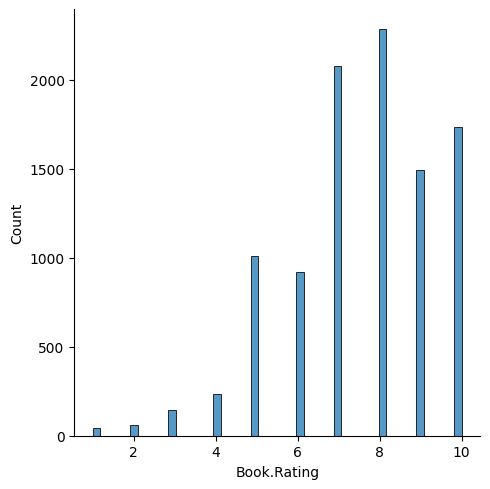

In [6]:
sns.displot(book['Book.Rating'])

<Axes: xlabel='Book.Rating', ylabel='count'>

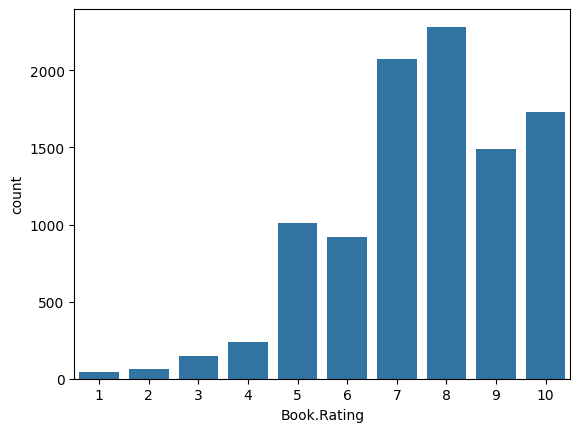

In [7]:
sns.countplot(x=book['Book.Rating'])

In [8]:

book=book.sort_values(['User.ID'])
book


,Unnamed: 0,User.ID,Book.Title,Book.Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [9]:
len(book['Book.Title'].unique())

9659

In [10]:
book_pivot=book.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)
book_pivot


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

book_pivot.index=book['User.ID'].unique()
book_pivot


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
book_pivot.fillna(0,inplace=True)
book_pivot

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
user_sim=1-pairwise_distances(book_pivot,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
df=pd.DataFrame(user_sim)
df



,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df.index=book['User.ID'].unique()
df.columns=book['User.ID'].unique()
df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
np.fill_diagonal(user_sim,0)
df


,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [18]:
book[(book['User.ID']==278846) | (book['User.ID']==276729)]


,Unnamed: 0,User.ID,Book.Title,Book.Rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
2376,2377,278846,Man's Search For Meaning,8


In [19]:
book[(book['User.ID']==276729) | (book['User.ID']==278852)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
2392,2393,278852,Bola da vez: Romance policial (ColeÃ§Ã£o Roman...,8


<ipython-input-20-debe860f1c73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=book.corr()


<Axes: >

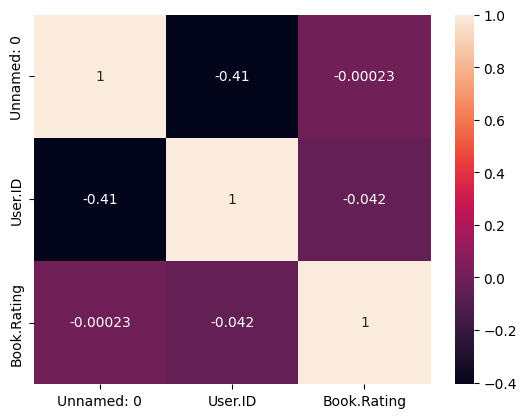

In [20]:
corr=book.corr()
sns.heatmap(corr,annot=True)


**'Correlation'**

In [21]:
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [22]:
data_pivot=book.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)
data_pivot


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_pivot.index=book['User.ID'].unique()
data_pivot

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
278852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data_pivot.fillna(0,inplace=True)
data_pivot.head()


Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
user_sim1=1-pairwise_distances(data_pivot,metric='correlation')
user_sim1

array([[ 1.00000000e+00, -2.71714970e-04, -2.71714970e-04, ...,
        -9.91259776e-04, -2.71714970e-04, -6.63481070e-04],
       [-2.71714970e-04,  1.00000000e+00, -1.03541106e-04, ...,
        -3.77734555e-04, -1.03541106e-04, -2.52829514e-04],
       [-2.71714970e-04, -1.03541106e-04,  1.00000000e+00, ...,
        -3.77734555e-04, -1.03541106e-04, -2.52829514e-04],
       ...,
       [-9.91259776e-04, -3.77734555e-04, -3.77734555e-04, ...,
         1.00000000e+00, -3.77734555e-04, -9.22362604e-04],
       [-2.71714970e-04, -1.03541106e-04, -1.03541106e-04, ...,
        -3.77734555e-04,  1.00000000e+00, -2.52829514e-04],
       [-6.63481070e-04, -2.52829514e-04, -2.52829514e-04, ...,
        -9.22362604e-04, -2.52829514e-04,  1.00000000e+00]])

In [27]:
df1=pd.DataFrame(user_sim1)
df1

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.000000,-0.000272,-0.000272,-0.000272,-0.000469,-0.000272,-0.000523,-0.000272,-0.000272,-0.000384,...,-0.000272,-0.000471,-0.000272,-0.001203,-0.000469,-0.000272,-0.000272,-0.000991,-0.000272,-0.000663
1,-0.000272,1.000000,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
2,-0.000272,-0.000104,1.000000,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
3,-0.000272,-0.000104,-0.000104,1.000000,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
4,-0.000469,-0.000179,-0.000179,-0.000179,1.000000,-0.000179,-0.000344,-0.000179,-0.000179,-0.000252,...,-0.000179,-0.000309,-0.000179,-0.000791,-0.000309,-0.000179,-0.000179,-0.000652,-0.000179,-0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,1.000000,-0.000104,-0.000378,-0.000104,-0.000253
2178,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,1.000000,-0.000378,-0.000104,-0.000253
2179,-0.000991,-0.000378,-0.000378,-0.000378,-0.000652,-0.000378,-0.000727,-0.000378,-0.000378,-0.000533,...,-0.000378,-0.000654,-0.000378,-0.001673,-0.000653,-0.000378,-0.000378,1.000000,-0.000378,-0.000922
2180,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,1.000000,-0.000253


In [28]:
df1.index=book['User.ID'].unique()
df1.column=book['User.ID'].unique()
df1

<ipython-input-28-c6e0fce11bab>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.column=book['User.ID'].unique()


,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
8,1.000000,-0.000272,-0.000272,-0.000272,-0.000469,-0.000272,-0.000523,-0.000272,-0.000272,-0.000384,...,-0.000272,-0.000471,-0.000272,-0.001203,-0.000469,-0.000272,-0.000272,-0.000991,-0.000272,-0.000663
9,-0.000272,1.000000,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
10,-0.000272,-0.000104,1.000000,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
12,-0.000272,-0.000104,-0.000104,1.000000,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
14,-0.000469,-0.000179,-0.000179,-0.000179,1.000000,-0.000179,-0.000344,-0.000179,-0.000179,-0.000252,...,-0.000179,-0.000309,-0.000179,-0.000791,-0.000309,-0.000179,-0.000179,-0.000652,-0.000179,-0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,1.000000,-0.000104,-0.000378,-0.000104,-0.000253
278849,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,1.000000,-0.000378,-0.000104,-0.000253
278851,-0.000991,-0.000378,-0.000378,-0.000378,-0.000652,-0.000378,-0.000727,-0.000378,-0.000378,-0.000533,...,-0.000378,-0.000654,-0.000378,-0.001673,-0.000653,-0.000378,-0.000378,1.000000,-0.000378,-0.000922
278852,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,1.000000,-0.000253


In [29]:

np.fill_diagonal(user_sim1,0)
df1

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
8,0.000000,-0.000272,-0.000272,-0.000272,-0.000469,-0.000272,-0.000523,-0.000272,-0.000272,-0.000384,...,-0.000272,-0.000471,-0.000272,-0.001203,-0.000469,-0.000272,-0.000272,-0.000991,-0.000272,-0.000663
9,-0.000272,0.000000,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
10,-0.000272,-0.000104,0.000000,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
12,-0.000272,-0.000104,-0.000104,0.000000,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,-0.000104,-0.000253
14,-0.000469,-0.000179,-0.000179,-0.000179,0.000000,-0.000179,-0.000344,-0.000179,-0.000179,-0.000252,...,-0.000179,-0.000309,-0.000179,-0.000791,-0.000309,-0.000179,-0.000179,-0.000652,-0.000179,-0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,0.000000,-0.000104,-0.000378,-0.000104,-0.000253
278849,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,0.000000,-0.000378,-0.000104,-0.000253
278851,-0.000991,-0.000378,-0.000378,-0.000378,-0.000652,-0.000378,-0.000727,-0.000378,-0.000378,-0.000533,...,-0.000378,-0.000654,-0.000378,-0.001673,-0.000653,-0.000378,-0.000378,0.000000,-0.000378,-0.000922
278852,-0.000272,-0.000104,-0.000104,-0.000104,-0.000179,-0.000104,-0.000199,-0.000104,-0.000104,-0.000146,...,-0.000104,-0.000179,-0.000104,-0.000458,-0.000179,-0.000104,-0.000104,-0.000378,0.000000,-0.000253


In [30]:
df1.idxmax(axis=1)

8            0
9            1
10           2
12           3
14           4
          ... 
278846    2177
278849    2178
278851    1999
278852    2180
278854    2181
Length: 2182, dtype: int64

In [31]:
book[(book['User.ID']==276729) | (book['User.ID']==276726)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


In [32]:
book[(book['User.ID']==276729) | (book['User.ID']==278852)]

,Unnamed: 0,User.ID,Book.Title,Book.Rating
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
2392,2393,278852,Bola da vez: Romance policial (ColeÃ§Ã£o Roman...,8
